## Biased and unbiased estimators: the variance

Suppose we have some quantity that we want to estimate from data. Typically we'll have some formula (or python function) that takes a sample of data and produces an estimate. Because the estimates depend on a (presumably random) sample of data, they are, themselves, random things. That means we can &mdash; and should &mdash; look at their distribution.

Here we'll imagine we have a sample $\{x_1, \dots, x_n\}$ of $n$ points drawn independently from some underlying distribution and investigate two estimators for the distribution's variance.

The *biased* estimator is
$$
    \frac{1}{n} \sum_{j=1}^n (x_j - \bar{x})^2
$$
where $\bar{x} = (1/n) \sum_{j=1}^n x_j$ is the mean of the data, while the *unbiased* estimator is
$$
    \frac{1}{n-1} \sum_{j=1}^n (x_j - \bar{x})^2,
$$
which differs from the biased one only in the factor in front of the sum.

### Code

In [9]:
# Load the libraries we'll use
######################################

# Basic numerics
import numpy as np
import scipy.stats as st

# Random number generation
from numpy.random import default_rng

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [10]:
# The main work for both estimators is to compute this sum
def sumOfSquares( x ):
    n = len(x) 
    sum_of_squares = 0.0 ;
    x_mean = np.sum( x ) / n
    for j in range(n):
        diff = x[j] - x_mean 
        sum_of_squares += diff * diff 
        
    return( sum_of_squares )

def biasedVarEstimate( x ):
    n = len(x)
    ss = sumOfSquares( x ) 
    return( ss / n )

def unbiasedVarEstimate( x ):
    n = len(x)
    ss = sumOfSquares( x ) 
    return( ss / (n-1) )

## Numerical experiment

Let's now:
  * take some distribution whose variance we know, say, the standard normal distribution with mean $\mu = 0$ and variance $\sigma^2 = 1$;
  * draw a smallish sample from it, then estimate the variance using both our estimators;
  * finally, repeat the previous two steps, say, 5000 times and see how the results are distributed.

#### Generating the estimates

In [14]:
# Fix the sizes of things
sampleSize = 10
nSamples = 5000

# Pre-allocate storage for the results
biasedEstimates = np.zeros(nSamples) 
unbiasedEstimates = np.zeros(nSamples) 

# Now do the sampling
my_rng = default_rng()
for j in range(nSamples):
    # Draw the sample
    x = my_rng.standard_normal(sampleSize)
    
    # Apply the estimators
    biasedEstimates[j] = biasedVarEstimate( x )
    unbiasedEstimates[j] = unbiasedVarEstimate( x )

#### Histograms

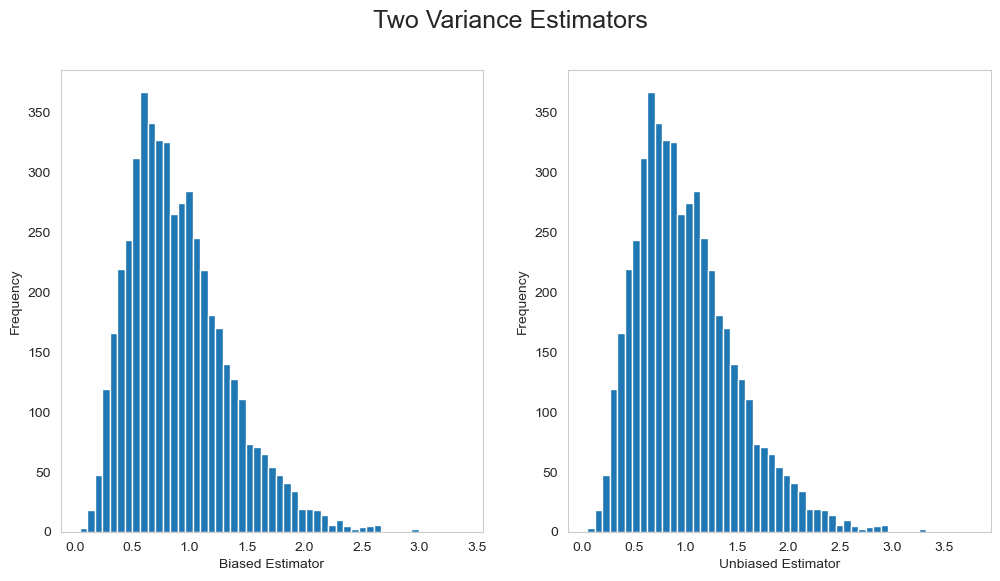

In [16]:
# Set the dimensions of the plot
heightInInches = 6
widthInInches = 12
myFig, myAxes = plt.subplots(1,2, figsize=[widthInInches,heightInInches])

# Draw the histograms
myAxes[0].hist( biasedEstimates, bins='fd' )
myAxes[0].set_xlabel('Biased Estimator')
myAxes[0].set_ylabel('Frequency')

myFig.suptitle('Two Variance Estimators', fontsize=18)

myAxes[1].hist( unbiasedEstimates, bins='fd' )
myAxes[1].set_xlabel('Unbiased Estimator')
myAxes[1].set_ylabel('Frequency')

plt.show()

#### Summary Stats

The histograms look very similar, but if we compute summary stats, the difference between the two estimators becomes clearer.

In [19]:
np.mean( biasedEstimates )

0.9079195592595359

In [20]:
np.mean( unbiasedEstimates )

1.0087995102883731

The unbiased estimator yields a distribution of estimates whose mean is (up to sampling error) the same as the true value: that's what it means to be *unbiased*.